<a href="https://colab.research.google.com/github/Geoff24/Show-Renewal-Prediction/blob/main/TV_Shows_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [ ]:
# netflix_tv = pd.read_csv("https://raw.githubusercontent.com/Geoff24/Show-Renewal-Prediction/main/netflix_titles.csv").drop(["director", "cast", "country", "date_added", "release_year", "rating", "listed_in", "show_id", "description"], axis = 1)
# netflix_tv = netflix_tv[netflix_tv.type == "TV Show"].drop(["type"], axis = 1)
# netflix_tv

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season


In [ ]:
# tv_shows = pd.read_csv("https://raw.githubusercontent.com/Geoff24/Show-Renewal-Prediction/main/tv_shows.csv").drop(["Unnamed: 0", "ID", "Year", "Age", "Hulu", "Prime Video", "Disney+", "Type"], axis = 1)
# tv_shows = tv_shows[tv_shows.Netflix == 1].drop(["Netflix"], axis = 1).rename({"Title": "title"}, axis =1)
# tv_shows

,title,IMDb,Rotten Tomatoes
0,Breaking Bad,9.4/10,100/100
1,Stranger Things,8.7/10,96/100
2,Attack on Titan,9.0/10,95/100
3,Better Call Saul,8.8/10,94/100
4,Dark,8.8/10,93/100
...,...,...,...
4701,Human Nature,NaN,13/100
5064,The Bad Batch,8.2/10,82/100
5097,The Muppets,7.4/10,64/100
5231,Pick of the Litter,8.1/10,47/100


In [ ]:
# netflix_tv_shows = pd.merge(netflix_tv, tv_shows, on = "title").dropna()

# netflix_tv_shows["IMDb"] = netflix_tv_shows["IMDb"].str.replace("/10", "").astype("float")
# netflix_tv_shows["Rotten Tomatoes"] = netflix_tv_shows["Rotten Tomatoes"].str.replace("/100", "").astype("int")
# netflix_tv_shows["duration"] = netflix_tv_shows["duration"].str.replace(" Season", "").str.replace("s", "").astype("int")

# netflix_tv_shows["Multiple Seasons"] = (netflix_tv_shows.duration>1).astype("int")

In [ ]:
netflix_tv_shows = pd.read_csv("https://raw.githubusercontent.com/Geoff24/Show-Renewal-Prediction/main/Sample_Netflix_Data.csv")
netflix_tv_shows

In [ ]:
x = netflix_tv_shows[["Rotten Tomatoes", "IMDb"]]
y = netflix_tv_shows['Multiple Seasons']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=2)

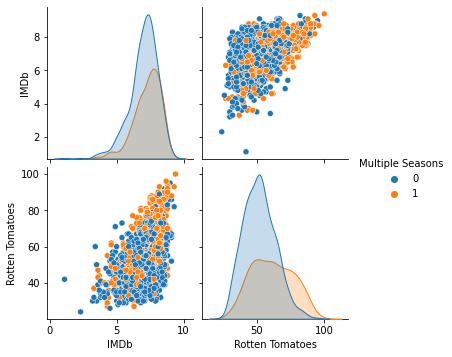

In [ ]:
sns.pairplot(netflix_tv_shows.drop(["duration"], axis = 1), hue = "Multiple Seasons")

In [ ]:
tree = DecisionTreeClassifier()

params = {
    "min_samples_leaf" : [1, 5, 10],
    "max_depth" : [1, 2, 5] 
}

gridSearch = GridSearchCV(tree, params)
gridSearch.fit(x_train, y_train)

a = pd.concat([pd.DataFrame(gridSearch.cv_results_["params"]), pd.DataFrame(gridSearch.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
a

,max_depth,min_samples_leaf,Accuracy
0,1,1,0.691589
1,1,5,0.691589
2,1,10,0.691589
3,2,1,0.691589
4,2,5,0.691589
5,2,10,0.691589
6,5,1,0.680180
7,5,5,0.665216
8,5,10,0.670219


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
params = {
    # "n_neighbors" : [1, 50, 100],
    "n_neighbors" : [1, 50],
    "weights" : ["uniform", "distance"]
}


gridSearch = GridSearchCV(knn, params)
gridSearch.fit(x_train, y_train)

a = pd.concat([pd.DataFrame(gridSearch.cv_results_["params"]), pd.DataFrame(gridSearch.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
a

,n_neighbors,weights,Accuracy
0,1,uniform,0.574065
1,1,distance,0.574065
2,50,uniform,0.684448
3,50,distance,0.641029
4,100,uniform,0.690165
5,100,distance,0.641739


In [ ]:
from sklearn.svm import SVC

svc = SVC()
params = {
    "kernel" : ["linear", "poly", "rbf"],
    "C" : [.1, 1, 5]
}

gridSearch = GridSearchCV(svc, params)
gridSearch.fit(x_train, y_train)

a = pd.concat([pd.DataFrame(gridSearch.cv_results_["params"]), pd.DataFrame(gridSearch.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
a

,C,kernel,Accuracy
0,0.1,linear,0.688027
1,0.1,poly,0.690877
2,0.1,rbf,0.688742
3,1.0,linear,0.688739
4,1.0,poly,0.690877
5,1.0,rbf,0.688744
6,5.0,linear,0.687316
7,5.0,poly,0.688744
8,5.0,rbf,0.689453
